C:\Users\lilha\AppData\Local\Temp\ipykernel_10576\2338690643.py:15: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download('BTC-USD', start='2023-01-01', end='2025-01-01')
[*********************100%***********************]  1 of 1 completed

--- Fetching BTC Prices from Yahoo Finance ---
Price              Close
Ticker           BTC-USD
Date                    
2023-01-01  16625.080078
2023-01-02  16688.470703
2023-01-03  16679.857422
2023-01-04  16863.238281
2023-01-05  16836.736328
--- 2. Training Linear Regression Model ---

--- Linear Regression Metrics ---

Training Metrics:
 MSE: 1791553.05
 RMSE: 1338.49
 R²: 0.9962
 MAPE: 1.73%

Validation Metrics:
 MSE: 2551855.30
 RMSE: 1597.45
 R²: 0.9945
 MAPE: 1.99%

--- 3. Preparing, Building, and Training LSTM Model ---
Epoch 1/35



c:\Users\lilha\OneDrive\Pictures\Desktop\5th-sem-Practicals\VirtualEnviorment\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0371 - val_loss: 0.0110
Epoch 2/35
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0060 - val_loss: 0.0023
Epoch 3/35
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0038 - val_loss: 0.0016
Epoch 4/35
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0031 - val_loss: 0.0016
Epoch 5/35
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0032 - val_loss: 0.0022
Epoch 6/35
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0029 - val_loss: 0.0016
Epoch 7/35
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0028 - val_loss: 0.0014
Epoch 8/35
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0028 - val_loss: 0.0016
Epoch 9/35
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0031 - val_loss: 0.0015
Epoch 10/35
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0028 - val_loss: 0.0014
Epoch 11/35
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0026 - val_loss: 0.0013
Epoch 12/35
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0028 - val_l


LSTM model saved to 'btc_lstm_model.h5'


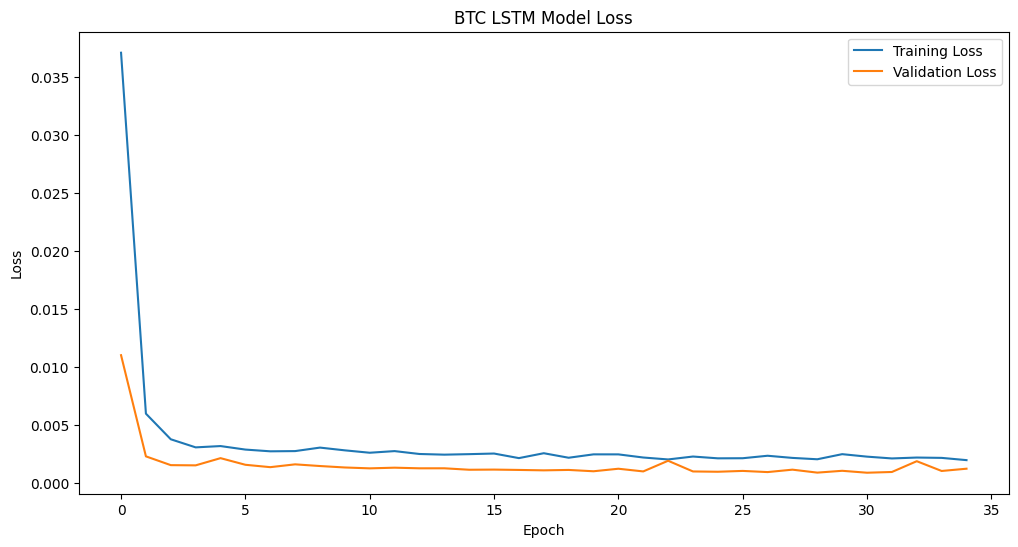


--- 4. Prediction on Validation Data Block ---


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Predictions on the validation data block:
    Actual_Close  Predicted_Close
0  101173.031250     94890.984375
1   30334.068359     30164.625000
2   27994.330078     27075.257812
3   69482.468750     67792.695312
4   65887.648438     62453.925781


In [8]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt
import joblib
import yfinance as yf

# --- 1. Fetch BTC Prices from Yahoo Finance ---
print("--- Fetching BTC Prices from Yahoo Finance ---")
df = yf.download('BTC-USD', start='2023-01-01', end='2025-01-01')
df = df[['Close']]  # Keep only 'Close' prices
df.index.name = 'Date'
data = df[['Close']].values
print(df.head())

# --- 2. Training Linear Regression Model ---
print("--- 2. Training Linear Regression Model ---")
X_lr = data[:-1]
y_lr = data[1:]

scaler_X_lr = MinMaxScaler()
X_lr_scaled = scaler_X_lr.fit_transform(X_lr)

scaler_y_lr = MinMaxScaler()
y_lr_scaled = scaler_y_lr.fit_transform(y_lr)

X_train_lr, X_val_lr, y_train_lr, y_val_lr = train_test_split(
    X_lr_scaled, y_lr_scaled, test_size=0.2, random_state=42
)

model_lr = LinearRegression()
model_lr.fit(X_train_lr, y_train_lr)

y_train_pred_scaled = model_lr.predict(X_train_lr)
y_val_pred_scaled = model_lr.predict(X_val_lr)

y_train_pred = scaler_y_lr.inverse_transform(y_train_pred_scaled)
y_val_pred = scaler_y_lr.inverse_transform(y_val_pred_scaled)
y_train_orig = scaler_y_lr.inverse_transform(y_train_lr)
y_val_orig = scaler_y_lr.inverse_transform(y_val_lr)

print("\n--- Linear Regression Metrics ---")
print("\nTraining Metrics:")
print(f" MSE: {mean_squared_error(y_train_orig, y_train_pred):.2f}")
print(f" RMSE: {np.sqrt(mean_squared_error(y_train_orig, y_train_pred)):.2f}")
print(f" R²: {r2_score(y_train_orig, y_train_pred):.4f}")
print(f" MAPE: {mean_absolute_percentage_error(y_train_orig, y_train_pred):.2%}")

print("\nValidation Metrics:")
print(f" MSE: {mean_squared_error(y_val_orig, y_val_pred):.2f}")
print(f" RMSE: {np.sqrt(mean_squared_error(y_val_orig, y_val_pred)):.2f}")
print(f" R²: {r2_score(y_val_orig, y_val_pred):.4f}")
print(f" MAPE: {mean_absolute_percentage_error(y_val_orig, y_val_pred):.2%}")
print("===================================")

# --- 3. Preparing, Building, and Training LSTM Model ---
print("\n--- 3. Preparing, Building, and Training LSTM Model ---")
scaler_lstm = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler_lstm.fit_transform(data)
joblib.dump(scaler_lstm, 'btc_lstm_scaler.pkl')

TIME_STEPS = 30
def create_sequences(data, time_steps):
    Xs, ys = [], []
    for i in range(len(data) - time_steps):
        Xs.append(data[i:(i + time_steps)])
        ys.append(data[i + time_steps])
    return np.array(Xs), np.array(ys)

X_sequences, y_sequences = create_sequences(data_scaled, TIME_STEPS)
X_train, X_val, y_train, y_val = train_test_split(
    X_sequences, y_sequences, test_size=0.2, random_state=42
)

model_lstm = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    LSTM(units=50, return_sequences=False),
    Dropout(0.2),
    Dense(units=1)
])
model_lstm.compile(optimizer='adam', loss='mean_squared_error')

history = model_lstm.fit(
    X_train, y_train,
    epochs=35,
    batch_size=32,
    validation_data=(X_val, y_val),
    verbose=1
)

model_lstm.save('btc_lstm_model.h5')
print("\nLSTM model saved to 'btc_lstm_model.h5'")

plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('BTC LSTM Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.savefig('btc_lstm_model_loss.png')
plt.show()

# --- 4. Prediction on New Data Block ---
print("\n--- 4. Prediction on Validation Data Block ---")
model_lstm_loaded = load_model('btc_lstm_model.h5')
scaler_lstm_loaded = joblib.load('btc_lstm_scaler.pkl')

predictions_scaled = model_lstm_loaded.predict(X_val)
predictions = scaler_lstm_loaded.inverse_transform(predictions_scaled)
y_actual = scaler_lstm_loaded.inverse_transform(y_val)

df_predictions = pd.DataFrame({
    'Actual_Close': y_actual.flatten(),
    'Predicted_Close': predictions.flatten()
})

print("Predictions on the validation data block:")
print(df_predictions.head())


C:\Users\lilha\AppData\Local\Temp\ipykernel_10576\1174677134.py:12: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download('BTC-USD', start='2023-01-01', end='2025-01-01')
[*********************100%***********************]  1 of 1 completed

--- Fetching BTC Prices from Yahoo Finance ---
Price              Close
Ticker           BTC-USD
Date                    
2023-01-01  16625.080078
2023-01-02  16688.470703
2023-01-03  16679.857422
2023-01-04  16863.238281
2023-01-05  16836.736328
Training data from 2023-01-01 00:00:00 to 2024-10-02 00:00:00
Testing data from 2024-10-03 00:00:00 to 2024-12-31 00:00:00

--- Training LSTM model on historical data only ---
Epoch 1/40



c:\Users\lilha\OneDrive\Pictures\Desktop\5th-sem-Practicals\VirtualEnviorment\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0554
Epoch 2/40
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0121
Epoch 3/40
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0073
Epoch 4/40
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0062
Epoch 5/40
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0059
Epoch 6/40
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0047
Epoch 7/40
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0058
Epoch 8/40
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0054
Epoch 9/40
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0046
Epoch 10/40
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0048
Epoch 11/40
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0047
Epoch 12/40
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0052
Epoch 13/40
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0045
Epoch 14/40
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0045
Epoch 15/40
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0046
Epoch 16/40
20/

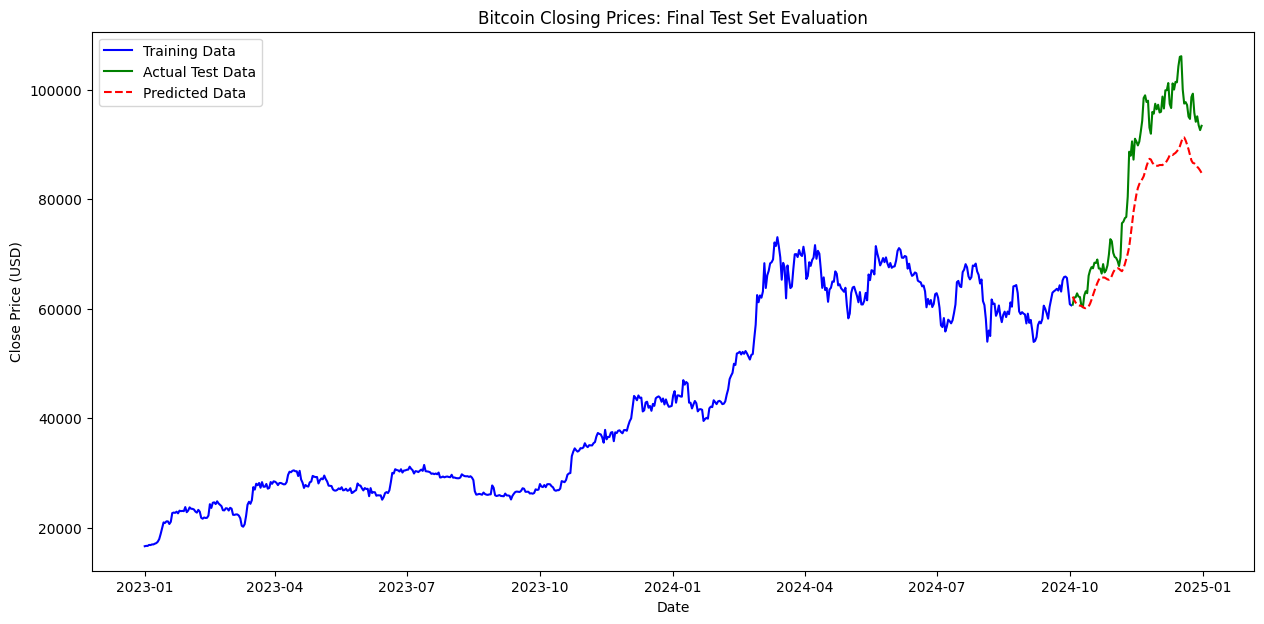

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt
import yfinance as yf

# --- 1. Fetch BTC Prices from Yahoo Finance ---
print("--- Fetching BTC Prices from Yahoo Finance ---")
df = yf.download('BTC-USD', start='2023-01-01', end='2025-01-01')
df = df[['Close']]  # Keep only 'Close' prices
df.index.name = 'Date'
print(df.head())

# --- 2. Train/Test Split ---
split_date = df.index[-90]  # Last 90 days for testing
train_df = df.loc[df.index < split_date]
test_df = df.loc[df.index >= split_date]
print(f"Training data from {train_df.index.min()} to {train_df.index.max()}")
print(f"Testing data from {test_df.index.min()} to {test_df.index.max()}")

# --- 3. Scaling ---
scaler = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler.fit_transform(train_df[['Close']])

TIME_STEPS = 30

def create_sequences(data, time_steps):
    Xs, ys = [], []
    for i in range(len(data) - time_steps):
        Xs.append(data[i:(i + time_steps)])
        ys.append(data[i + time_steps])
    return np.array(Xs), np.array(ys)

X_train, y_train = create_sequences(train_scaled, TIME_STEPS)

# --- 4. Training LSTM Model ---
print("\n--- Training LSTM model on historical data only ---")
model_lstm = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    LSTM(units=50, return_sequences=False),
    Dropout(0.2),
    Dense(units=1)
])
model_lstm.compile(optimizer='adam', loss='mean_squared_error')
model_lstm.fit(
    X_train, y_train,
    epochs=40,
    batch_size=32,
    verbose=1
)

# --- 5. Testing Model on Unseen Future Data ---
print("\n--- Testing model on unseen future data ---")
inputs = df['Close'][len(df) - len(test_df) - TIME_STEPS:].values
inputs = inputs.reshape(-1, 1)
inputs_scaled = scaler.transform(inputs)
X_test, y_test = create_sequences(inputs_scaled, TIME_STEPS)
predictions_scaled = model_lstm.predict(X_test)
predictions = scaler.inverse_transform(predictions_scaled)
y_test_actual = scaler.inverse_transform(y_test)

# --- 6. Final Model Performance ---
print("\n--- Final Model Performance on Unseen Test Data ---")
test_mse = mean_squared_error(y_test_actual, predictions)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test_actual, predictions)
test_mape = mean_absolute_percentage_error(y_test_actual, predictions)
print(f" Test MSE: {test_mse:.2f}")
print(f" Test RMSE: {test_rmse:.2f}")
print(f" Test R²: {test_r2:.4f}")
print(f" Test MAPE: {test_mape:.2%}")
print("===================================================")

# --- 7. Plotting ---
plt.figure(figsize=(15, 7))
plt.plot(train_df.index, train_df['Close'], color='blue', label='Training Data')
plt.plot(test_df.index, y_test_actual, color='green', label='Actual Test Data')
plt.plot(test_df.index, predictions, color='red', linestyle='--', label='Predicted Data')
plt.title('Bitcoin Closing Prices: Final Test Set Evaluation')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.savefig('final_test_evaluation_btc.png')
plt.show()
